# Data Loading

In [9]:
import pandas as pd
file_path = 'eth.csv'
df = pd.read_csv(file_path)
print(df)

                           Date         Open         High          Low  \
0     2017-11-09 00:00:00+00:00   308.644989   329.451996   307.056000   
1     2017-11-10 00:00:00+00:00   320.670990   324.717987   294.541992   
2     2017-11-11 00:00:00+00:00   298.585999   319.453003   298.191986   
3     2017-11-12 00:00:00+00:00   314.690002   319.153015   298.513000   
4     2017-11-13 00:00:00+00:00   307.024994   328.415009   307.024994   
...                         ...          ...          ...          ...   
2205  2023-11-23 00:00:00+00:00  2063.905518  2088.031982  2041.464233   
2206  2023-11-24 00:00:00+00:00  2062.411865  2132.481201  2060.999023   
2207  2023-11-25 00:00:00+00:00  2081.296143  2091.342773  2067.917236   
2208  2023-11-26 00:00:00+00:00  2084.177490  2094.095947  2038.600464   
2209  2023-11-28 00:00:00+00:00  2027.517212  2038.695801  2021.605957   

            Close       Volume  
0      320.884003    893249984  
1      299.252991    885985984  
2      314.6

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Convert 'Date' to DateTime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Set 'Date' as Index
df.set_index('Date', inplace=True)

# 3. Sort DataFrame by Date
df.sort_index(inplace=True)

# 4. Handle Missing Values (if any)
df.dropna(inplace=True)  # Drop rows with missing values

# 5. Check for Outliers (optional)
# You can use statistical methods or visualization techniques to identify outliers

# 6. Normalize Numerical Features (optional)
# This step is optional and depends on the model you're using
scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Display the preprocessed DataFrame
print(df.head())

                               Open      High       Low     Close    Volume
Date                                                                       
2017-11-09 00:00:00+00:00 -0.815875 -0.805535 -0.809004 -0.805788 -1.091831
2017-11-10 00:00:00+00:00 -0.805133 -0.809645 -0.820563 -0.825116 -1.092541
2017-11-11 00:00:00+00:00 -0.824860 -0.814215 -0.817191 -0.811331 -1.096815
2017-11-12 00:00:00+00:00 -0.810476 -0.814476 -0.816895 -0.817383 -1.021368
2017-11-13 00:00:00+00:00 -0.817322 -0.806436 -0.809033 -0.809512 -1.077289


# EDA (Explanatory Data Analysis)

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
df = pd.read_csv("eth.csv")
df['Date'] = pd.to_datetime(df.Date)
df.head()
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2017-11-09 00:00:00+00:00
Ending date:  2023-11-28 00:00:00+00:00
Duration:  2210 days 00:00:00


In [12]:
y_2017 = df.loc[(df['Date'] >= '2017-11-09')
                     & (df['Date'] < '2018-12-01')]

y_2017.drop(y_2017[['Close','Volume']],axis=1)

,Date,Open,High,Low
0,2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000
1,2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992
2,2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986
3,2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000
4,2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994
...,...,...,...,...
382,2018-11-26 00:00:00+00:00,116.343002,118.200996,104.892998
383,2018-11-27 00:00:00+00:00,107.913002,111.842003,102.452003
384,2018-11-28 00:00:00+00:00,110.197998,126.047997,110.197998
385,2018-11-29 00:00:00+00:00,122.721550,123.229721,115.297691


In [13]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1093.099893,1103.646004
February,882.527006,873.116318
March,640.787129,625.761325
April,512.148933,521.103667
May,682.046129,678.795518
June,524.591968,520.528231
July,464.046514,463.327677
August,327.069223,322.050938
September,229.290601,227.460833


In [14]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
title='Monthwise comparision between Stock open and close price')
fig.show()

<Axes: xlabel='Date'>

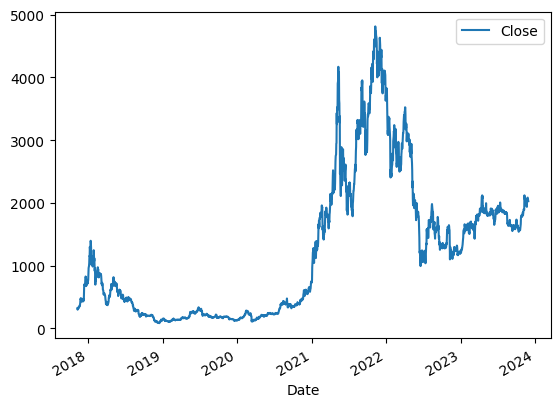

In [15]:
df.plot(x = 'Date', y = 'Close')

              Open         High          Low        Close        Volume
count  2210.000000  2210.000000  2210.000000  2210.000000  2.210000e+03
mean   1222.064553  1257.387414  1182.903566  1222.656440  1.205329e+10
std    1119.811603  1152.209419  1082.869594  1119.372181  1.022372e+10
min      84.279694    85.342743    82.829887    84.308296  6.217330e+08
25%     229.180355   234.201077   224.547623   229.258301  4.670823e+09
50%     860.440521   885.161011   827.207001   865.433502  9.295888e+09
75%    1844.119843  1873.616760  1808.012543  1845.571716  1.667949e+10
max    4810.071289  4891.704590  4718.039062  4812.087402  8.448291e+10


<ipython-input-16-23704d2765e1>:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



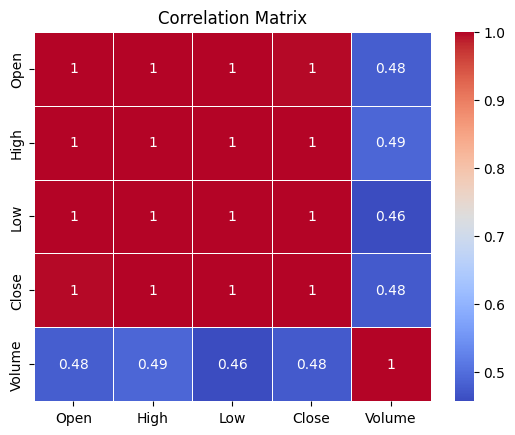

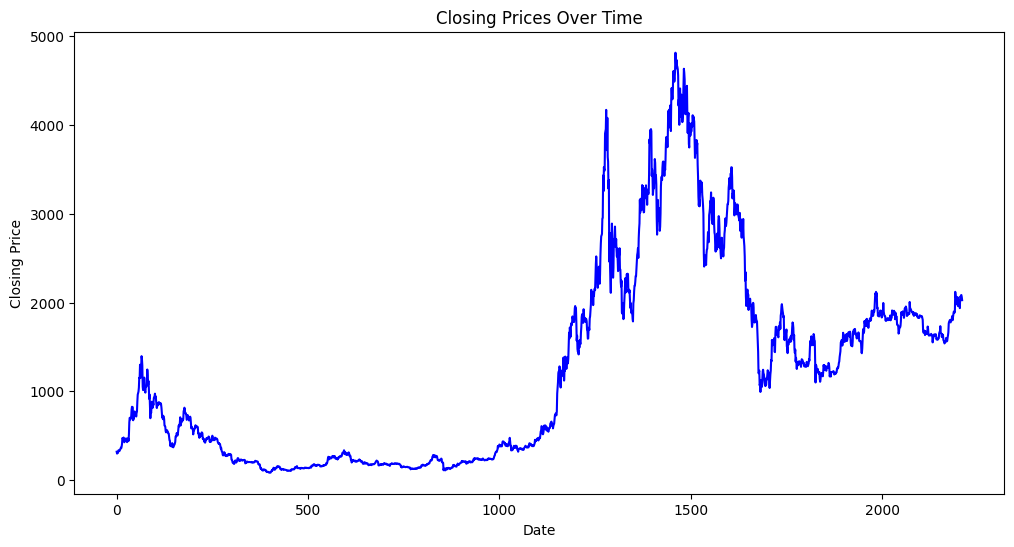

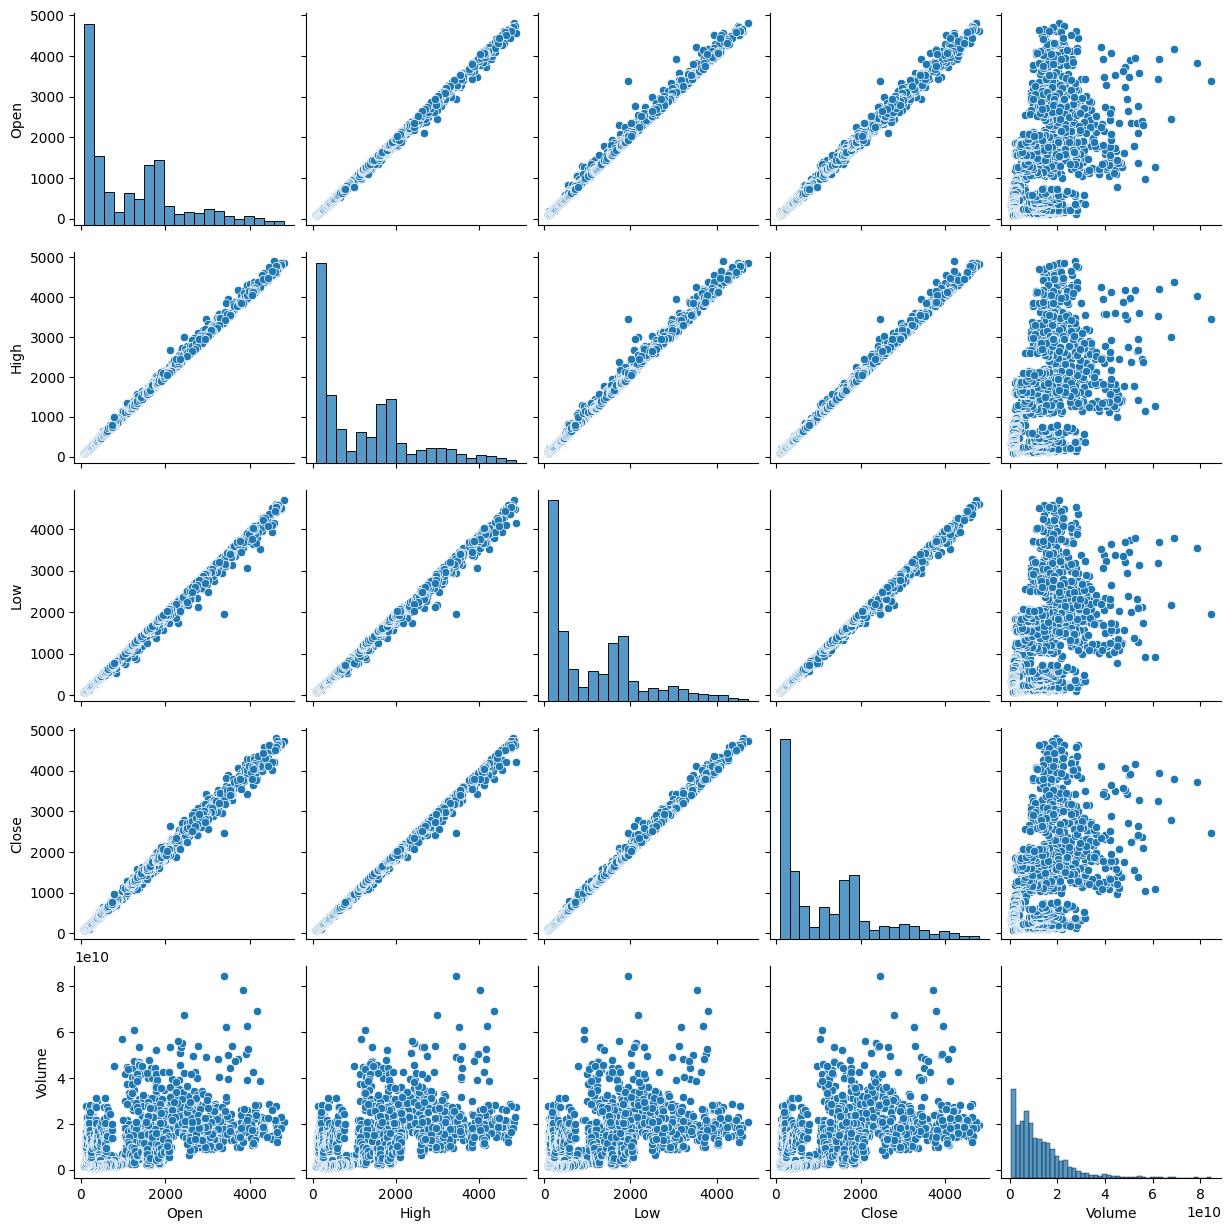

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the financial data

# Display basic statistics of numerical columns
print(df.describe())

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Time series plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Pairplot of selected features
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']
sns.pairplot(df[selected_features])
plt.show()

# # Boxplot of closing prices by month
# df['Month'] = df.index.month
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Month', y='Close', data=df)
# plt.title('Closing Prices Distribution by Month')
# plt.xlabel('Month')
# plt.ylabel('Closing Price')
# plt.show()


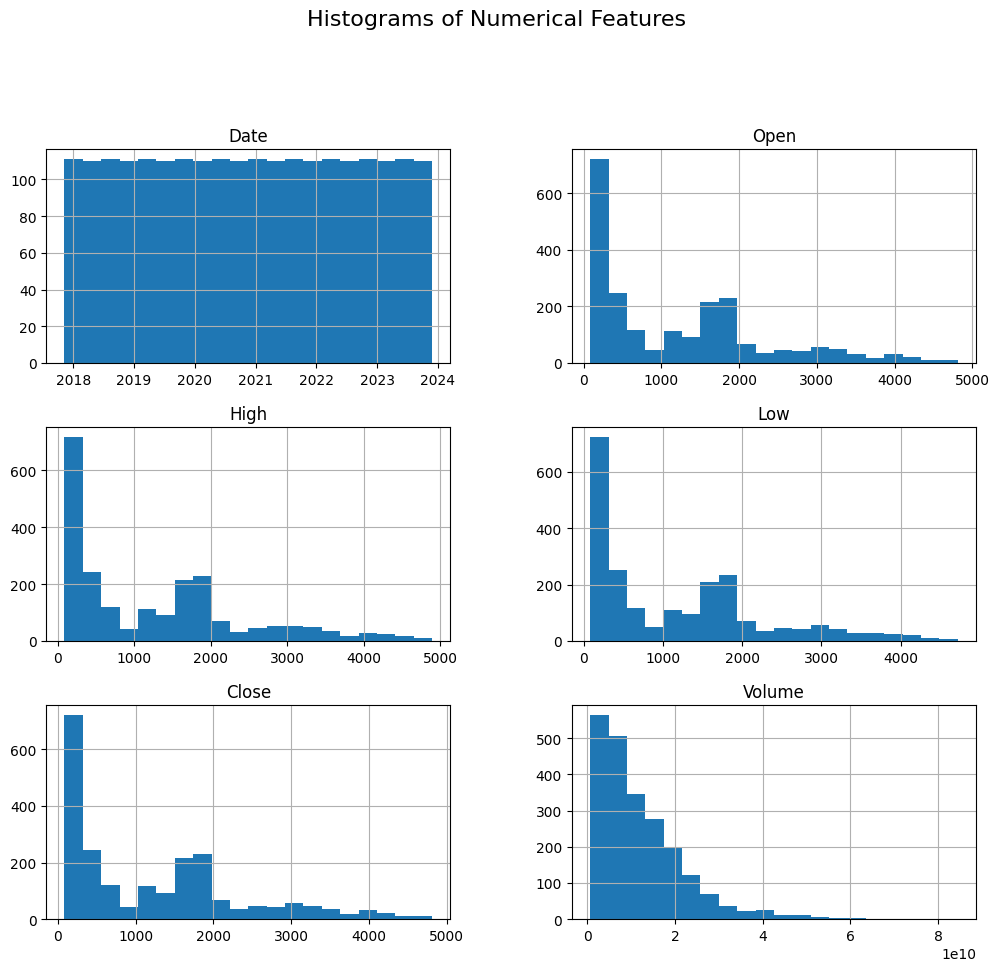

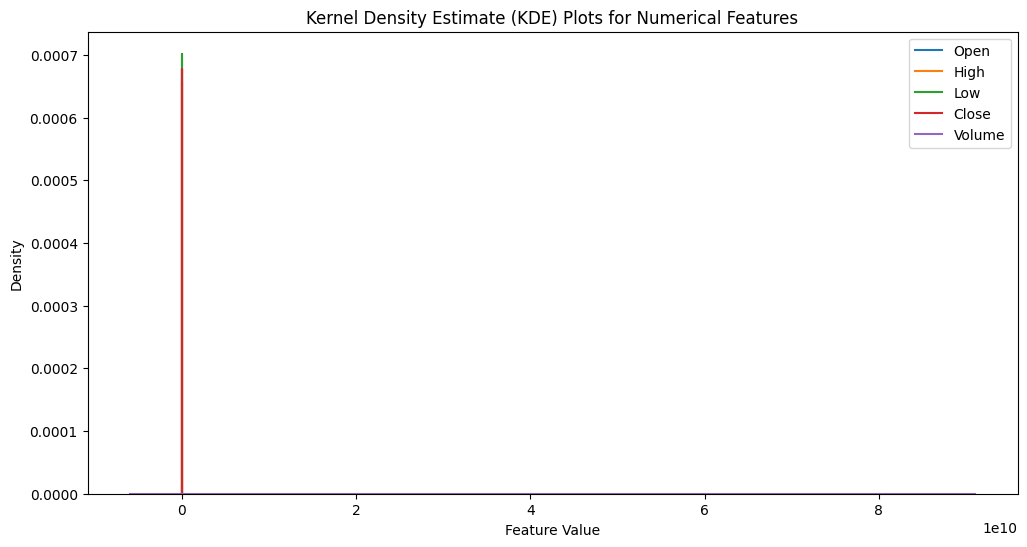

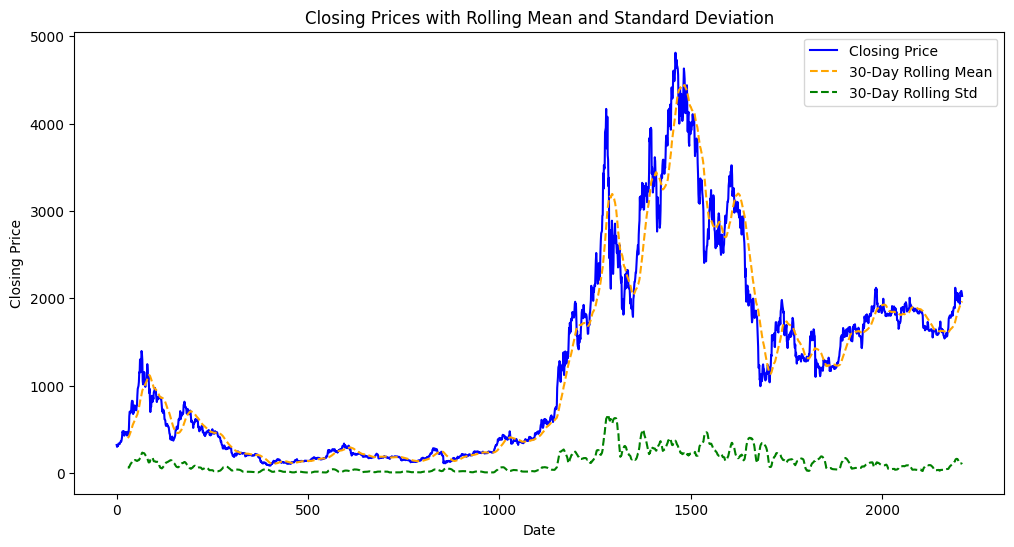

In [18]:
# Histograms of numerical features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, fontsize=16)
plt.show()

# KDE plots for numerical features
plt.figure(figsize=(12, 6))
for feature in selected_features:
    sns.kdeplot(df[feature], label=feature)
plt.title('Kernel Density Estimate (KDE) Plots for Numerical Features')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Rolling mean and standard deviation of closing prices
plt.figure(figsize=(12, 6))
df['Close'].plot(label='Closing Price', color='blue')
df['Close'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', linestyle='--', color='orange')
df['Close'].rolling(window=30).std().plot(label='30-Day Rolling Std', linestyle='--', color='green')
plt.title('Closing Prices with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# # Monthly average closing prices
# monthly_avg = df.resample('M').mean()
# plt.figure(figsize=(12, 6))
# monthly_avg['Close'].plot(label='Monthly Average Closing Price', marker='o', color='purple')
# plt.title('Monthly Average Closing Prices')
# plt.xlabel('Date')
# plt.ylabel('Average Closing Price')
# plt.legend()
# plt.show()


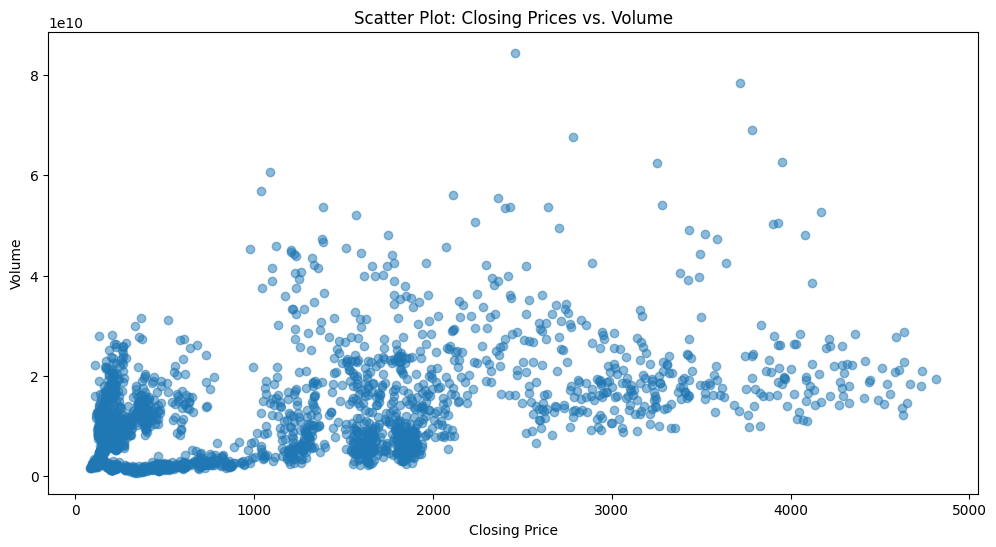

In [19]:
import numpy as np

# Assuming df is your DataFrame with financial data

# Scatter plot of closing prices and volume
plt.figure(figsize=(12, 6))
plt.scatter(df['Close'], df['Volume'], alpha=0.5)
plt.title('Scatter Plot: Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.show()



# Hyper Parameter Tuning and Scaling

In [20]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'eth.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)
import pandas as pd

# Assuming 'df' is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])
# Check for missing values
print(df.isnull().sum())
# Sort DataFrame by Date
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

                           Date         Open         High          Low  \
0     2017-11-09 00:00:00+00:00   308.644989   329.451996   307.056000   
1     2017-11-10 00:00:00+00:00   320.670990   324.717987   294.541992   
2     2017-11-11 00:00:00+00:00   298.585999   319.453003   298.191986   
3     2017-11-12 00:00:00+00:00   314.690002   319.153015   298.513000   
4     2017-11-13 00:00:00+00:00   307.024994   328.415009   307.024994   
...                         ...          ...          ...          ...   
2205  2023-11-23 00:00:00+00:00  2063.905518  2088.031982  2041.464233   
2206  2023-11-24 00:00:00+00:00  2062.411865  2132.481201  2060.999023   
2207  2023-11-25 00:00:00+00:00  2081.296143  2091.342773  2067.917236   
2208  2023-11-26 00:00:00+00:00  2084.177490  2094.095947  2038.600464   
2209  2023-11-28 00:00:00+00:00  2027.517212  2038.695801  2021.605957   

            Close       Volume  
0      320.884003    893249984  
1      299.252991    885985984  
2      314.6

## IN THIS MINMAX SCALAR IS USED BUT IT HAS THE SAME RESULTS AS THE STANDARD SCALAR

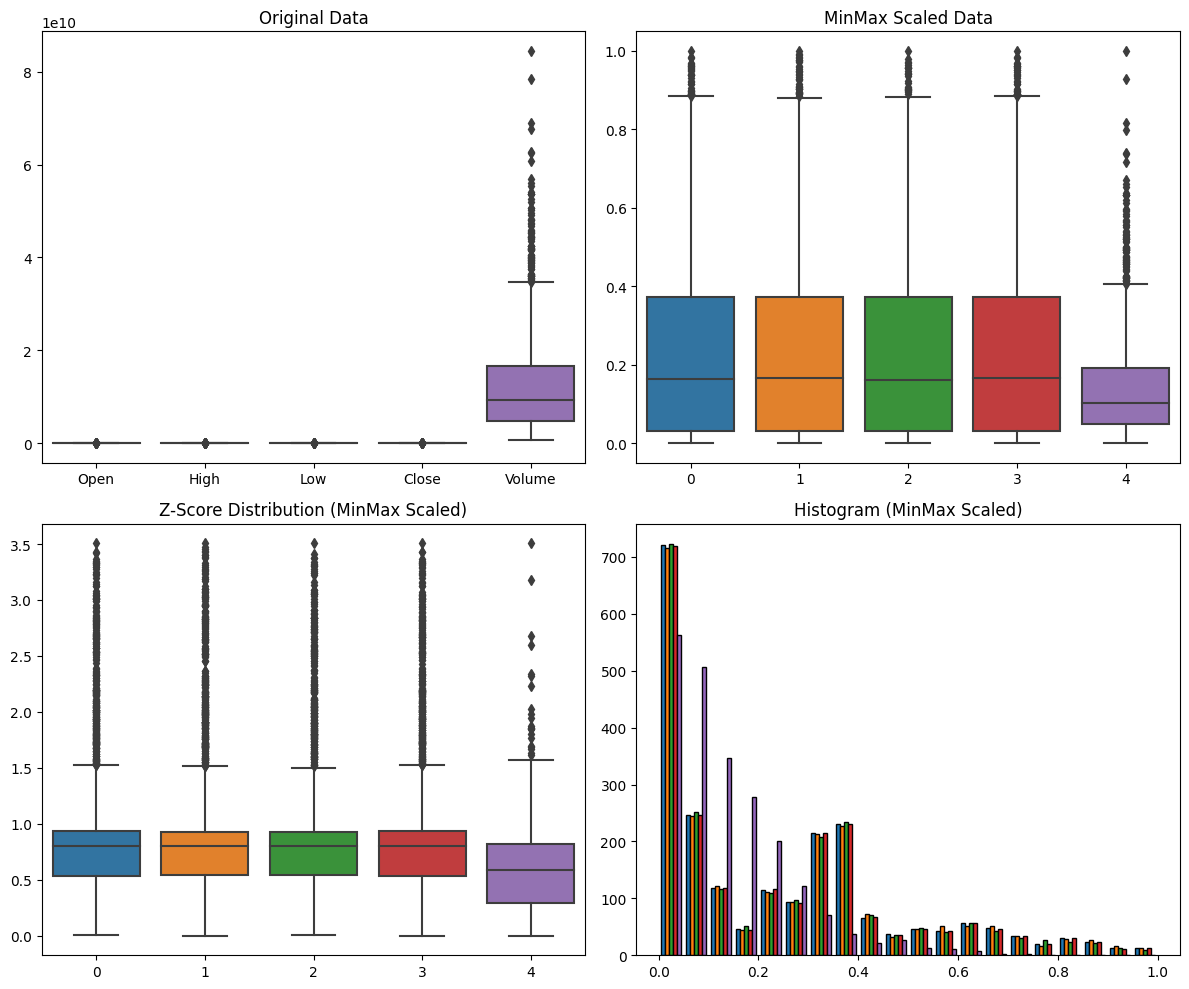

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract numeric columns for scaling
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
data_to_scale = df[numeric_cols]

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(data_to_scale)

# Visualize the distribution of scaled data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Original Data
sns.boxplot(data=data_to_scale, ax=axes[0, 0])
axes[0, 0].set_title('Original Data')

# MinMax Scaled Data
sns.boxplot(data=data_minmax_scaled, ax=axes[0, 1])
axes[0, 1].set_title('MinMax Scaled Data')

# Z-Score Distribution
z_scores_minmax = np.abs((data_minmax_scaled - data_minmax_scaled.mean()) / data_minmax_scaled.std())
sns.boxplot(data=z_scores_minmax, ax=axes[1, 0])
axes[1, 0].set_title('Z-Score Distribution (MinMax Scaled)')

# Histogram of MinMax Scaled Data
axes[1, 1].hist(data_minmax_scaled, bins=20, edgecolor='black')
axes[1, 1].set_title('Histogram (MinMax Scaled)')

plt.tight_layout()
plt.show()


Mean Squared Error on Test Set: 159.47211095922302


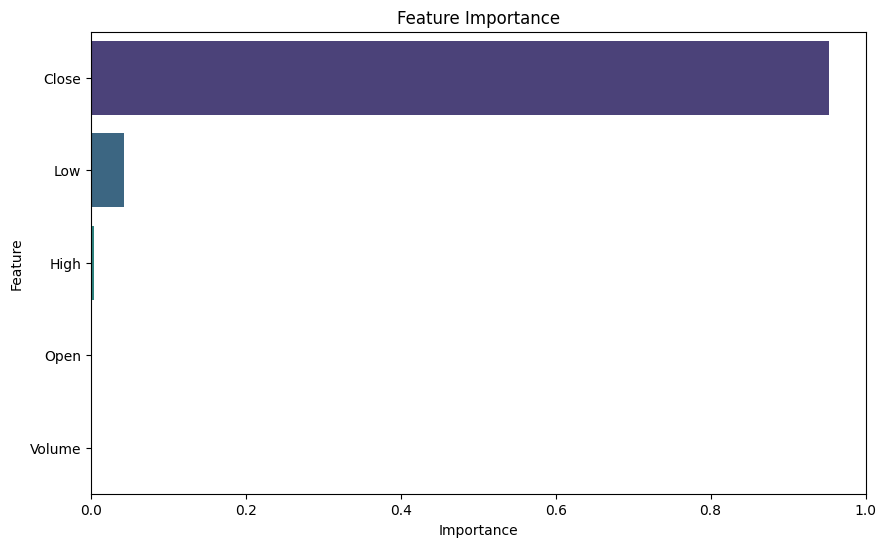

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract features and target variable
X = df[numeric_cols]  # Assuming you want to use the numeric columns for prediction
y = df['Close']  # Replace 'TargetColumn' with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': numeric_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


Text(0.5, 1.0, 'Actual vs. Predicted Values')

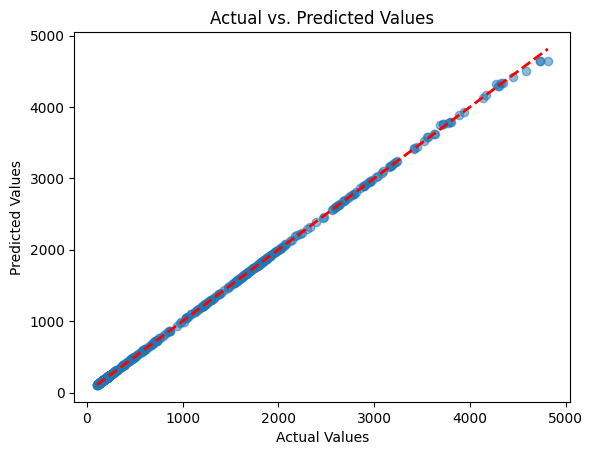

In [23]:
# Actual vs. Predicted values
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

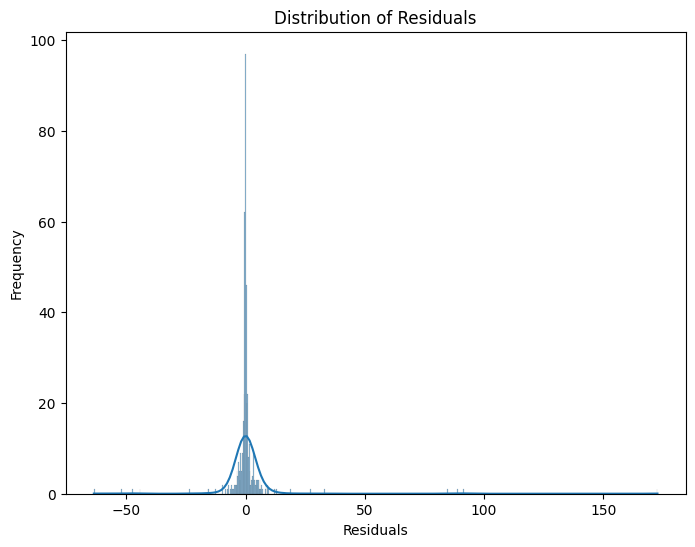

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Applying Multiple Models on Data

## Linear Regressor

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('eth.csv')
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
#Test Train Split
features = ['Open', 'Low', 'High', 'Volume']
X = df[features]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#model implimentation
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 734.19
R-squared (R2): 1.00
Mean Absolute Error (MAE): 15.52


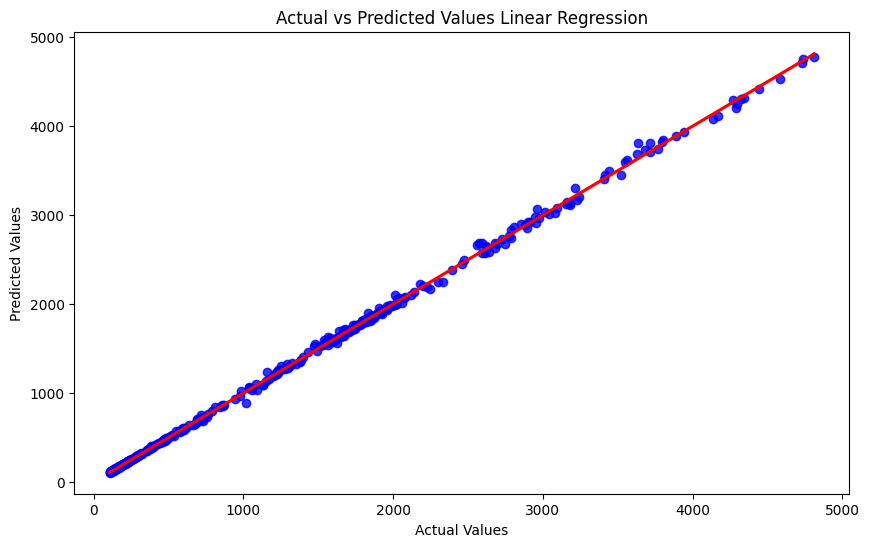

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Values Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Random Forest

Mean Squared Error (MSE): 664.74
R-squared (R2): 0.99
Mean Absolute Error (MAE): 18.73


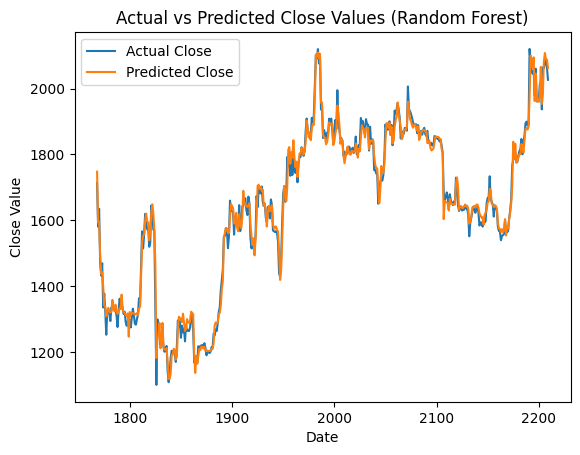

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame

# Features and target variable
features = ['Open', 'High', 'Low', 'Volume']  # Add other features as needed
target = 'Close'

# Train-test split
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plotting actual vs predicted values
plt.plot(test.index, y_test, label='Actual Close')
plt.plot(test.index, y_pred, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values (Random Forest)')
plt.legend()
plt.show()


## Decision Trees Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
#Test Train Split
features = ['Open', 'Low', 'High', 'Volume']
X = df[features]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
predictions = model.predict(X_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 3117.49
R-squared (R2): 1.00
Mean Absolute Error (MAE): 28.65


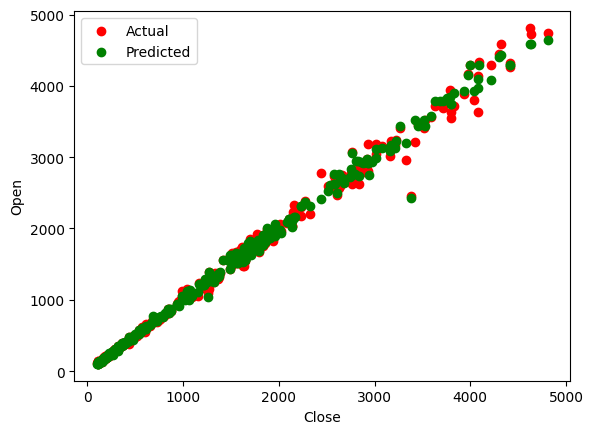

In [32]:
plt.scatter(X_test['Open'], y_test, color='Red', label='Actual')
plt.scatter(X_test['Open'], y_pred, color='Green', label='Predicted')
plt.xlabel('Close')
plt.ylabel('Open')
plt.legend()
plt.show()

## LSTM

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [34]:
scalar = MinMaxScaler(feature_range = (0, 1))
scaled_data = scalar.fit_transform(df['Close'].values.reshape(-1, 1))

prediction_days = 60

X_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
68/68 [==============================] - 13s 14ms/step - loss: 0.0092
Epoch 2/25
68/68 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 3/25
68/68 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 4/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0028
Epoch 5/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 6/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0023
Epoch 7/25
68/68 [==============================] - 1s 16ms/step - loss: 0.0022
Epoch 8/25
68/68 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 9/25
68/68 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 10/25
68/68 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 11/25
68/68 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 12/25
68/68 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 13/25
68/68 [=================

[*********************100%%**********************]  1 of 1 completed
46/46 [==============================] - 1s 6ms/step


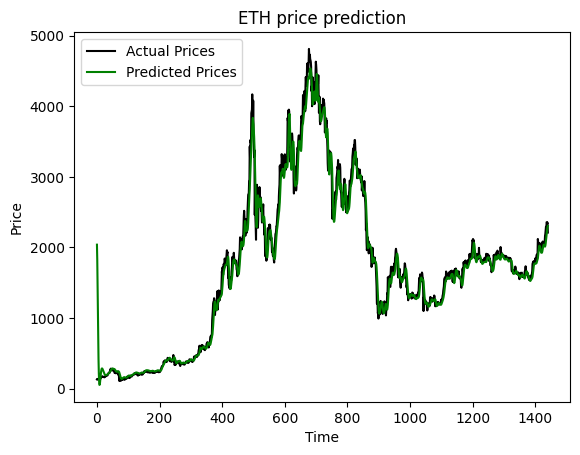

In [36]:
test_start = dt.datetime(2020,1 , 1)
test_end = dt.datetime.now()

symbol = 'ETH-USD'
test_data = yf.download(symbol, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scalar.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scalar.inverse_transform(prediction_prices)

plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title('ETH price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [37]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scalar.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 1s 1s/step
[[2290.575]]


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(actual_prices, prediction_prices)
mae = mean_absolute_error(actual_prices, prediction_prices)
r2 = r2_score(actual_prices, prediction_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 25660.98065956552
Mean Absolute Error (MAE): 95.53020269749977
R-squared (R2): 0.9792981204668947


## Gradient Boosted Trees

Mean Squared Error (MSE): 664.74
R-squared (R2): 0.99
Mean Absolute Error (MAE): 18.73


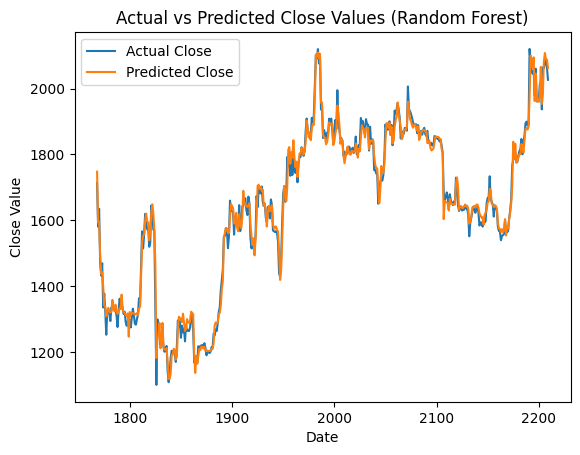

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming df is your preprocessed DataFrame

# Features and target variable
features = ['Open', 'High', 'Low', 'Volume']  # Add other features as needed
target = 'Close'

# Train-test split
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Initialize and train the Gradient Boosted Trees model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plotting actual vs predicted values
plt.plot(test.index, y_test, label='Actual Close')
plt.plot(test.index, y_pred, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values (Random Forest)')
plt.legend()
plt.show()



## Ridge Regression

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y = df['Close']
Cols = ['Open','Low','High','Volume']
X = df[Cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 734.19
R-squared (R2): 1.00
Mean Absolute Error (MAE): 15.52


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.6529e-18): result may not be accurate.



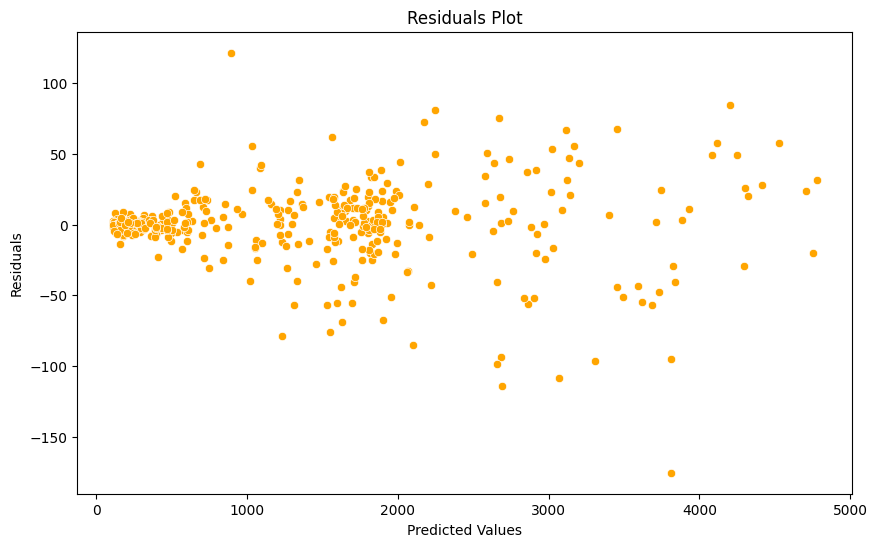

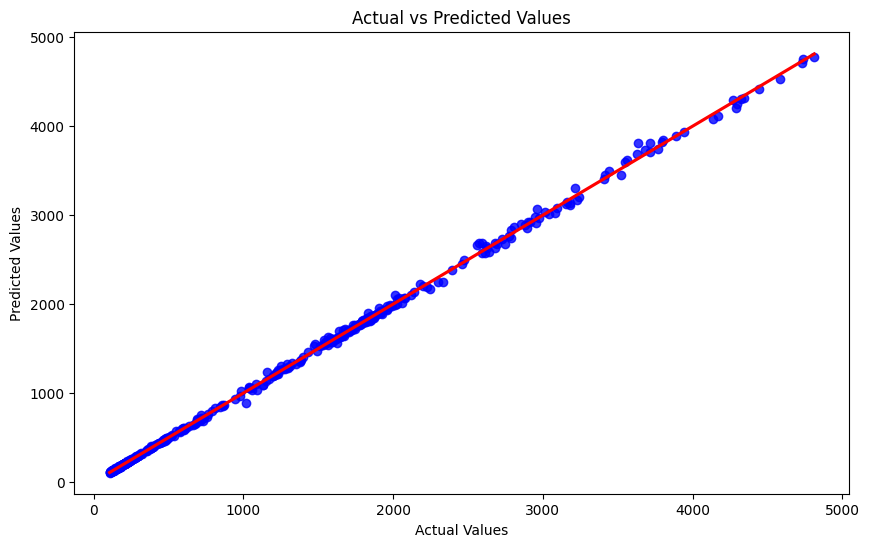

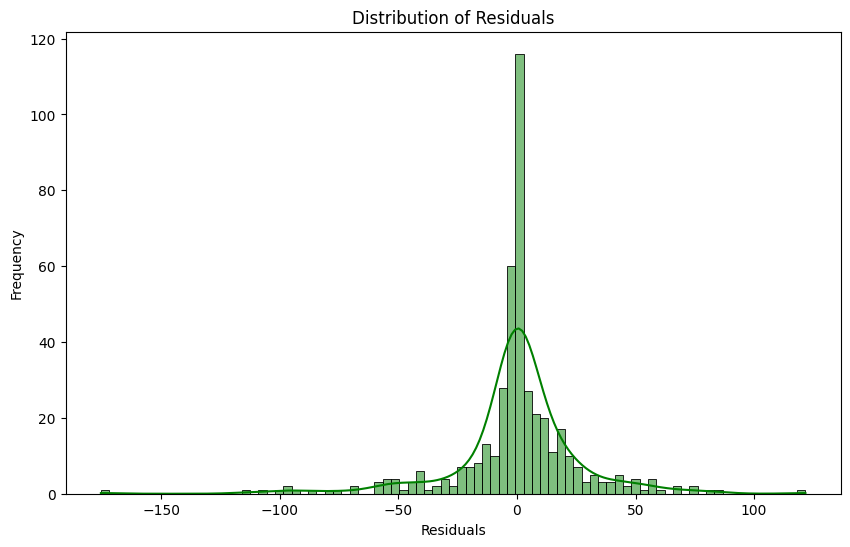

In [41]:
sns.set_palette("husl")

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Neural Network Regressor (MLP)

In [42]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 1288745.54
R-squared (R2): -0.03
Mean Absolute Error (MAE): 846.30


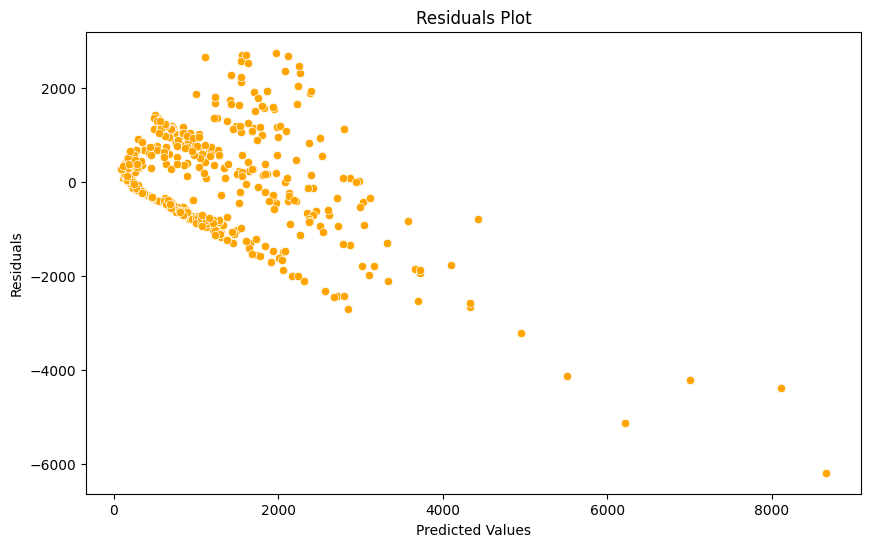

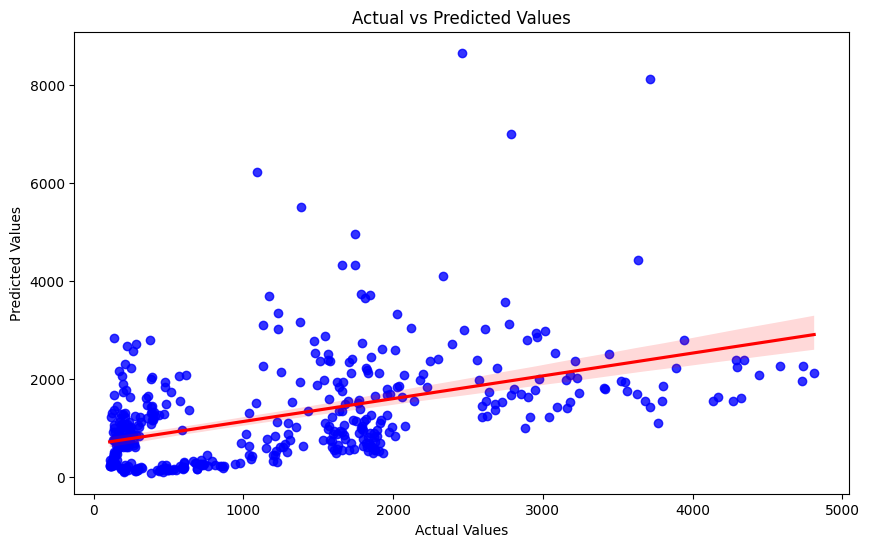

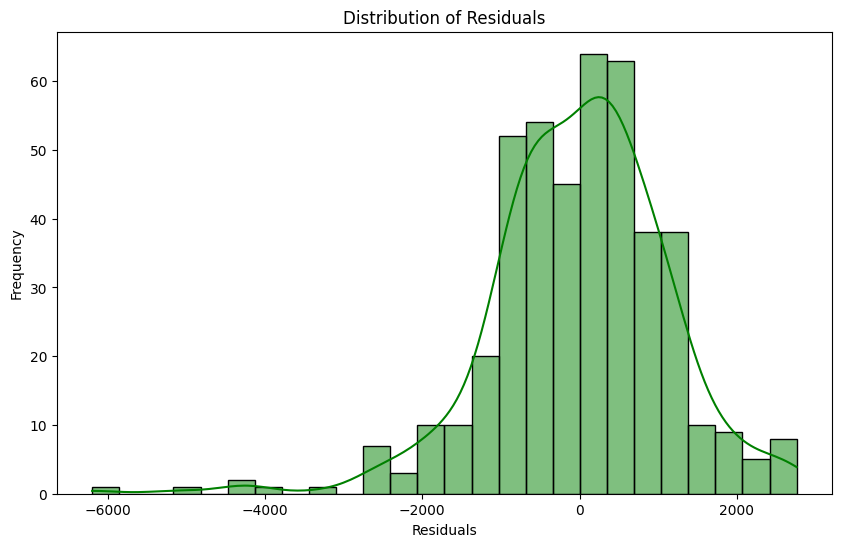

In [43]:
sns.set_palette("husl")

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()